<a href="https://colab.research.google.com/github/Mehranmollanorozi/Linear-Regresson/blob/main/Linear_Regression_LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['Country'],axis=1 , inplace = True)

In [ ]:
df = pd.get_dummies(df, columns=['Status'],drop_first = True)

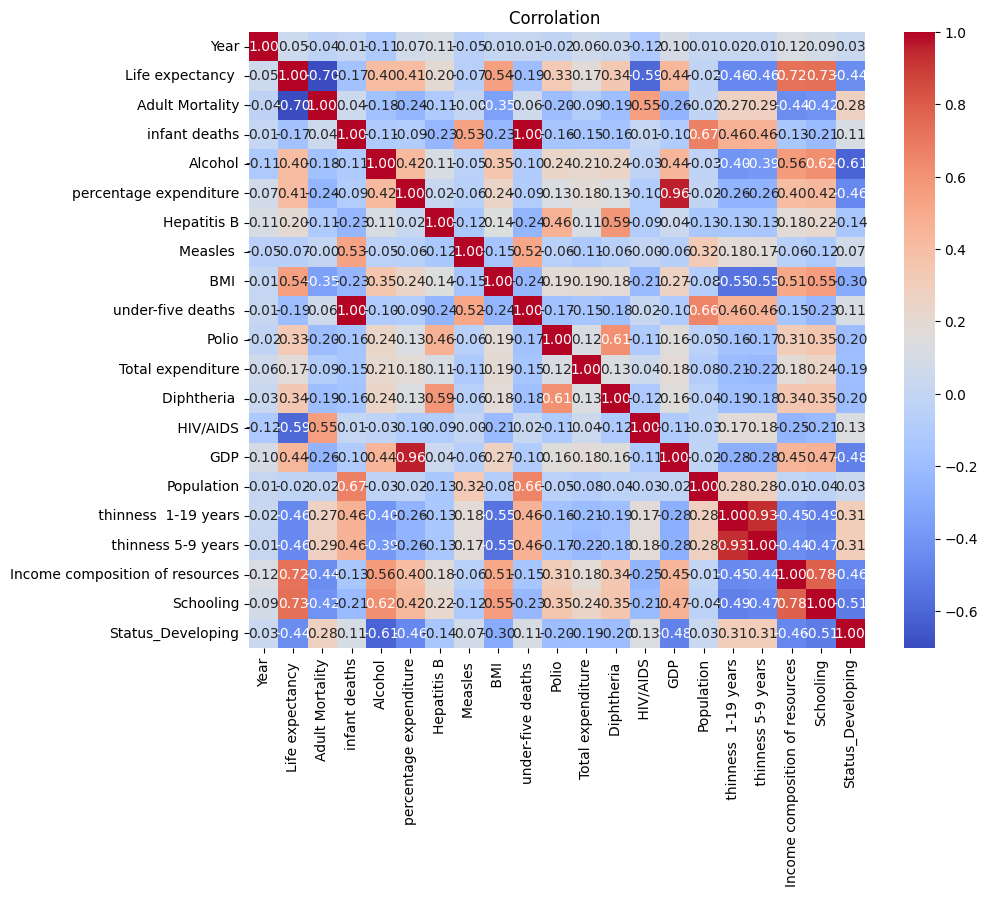

In [ ]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Corrolation ')
plt.show()

In [ ]:
X = df.drop(["Life expectancy "] , axis = 1)
y = df['Life expectancy ']

In [ ]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(mse)
print(r2)

13.014944111868433
0.8167489604602882


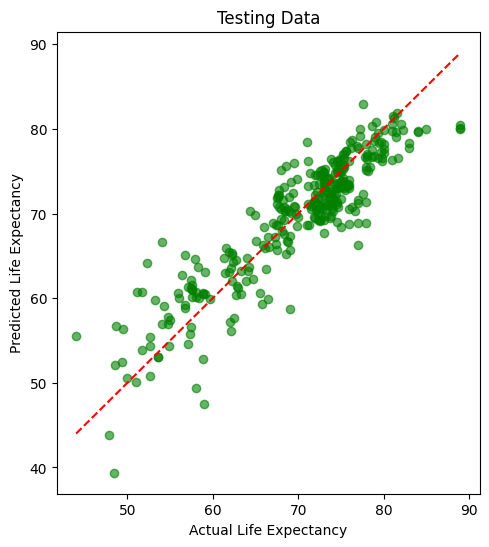

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.title("Testing Data")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
